# ImageJ Tutorials and Demo

Welcome to the ImageJ tutorial series. These notebooks offer a hands-on series of lessons for learning ImageJ.

* For a quick demo of what ImageJ can do, ___just scroll down___!

* To dive in to the tutorials, click the links below. If ImageJ is new to you, please try the "Using ImageJ" notebooks first.

* For a thorough academic overview of the ImageJ software stack, including its features, history, motivation and goals, see:
  > Rueden, C. T., et al. "[ImageJ2: ImageJ for the next generation of scientific image data](https://arxiv.org/abs/1701.05940)." arXiv preprint (2017).
  
* Learn more about ImageJ at [imagej.net](https://imagej.net/). Learn about [Beaker Notebook](http://beakernotebook.com/) from its tutorials: Help → Tutorial.

Feedback is very welcome! Please start a discussion with us on the [ImageJ Forum](http://forum.imagej.net/)!

<div class="row">
  <div class="col-md-12" style="border-top: solid 1px #888; margin-top: 20px;">
  </div>
</div>
<div class="row">
  <div class="col-md-6">
    <h2>1. Using ImageJ</h2>
    <ol>
      <li><a href="1. Using ImageJ/1. Fundamentals of ImageJ.ipynb">Fundamentals of ImageJ</a></li>
      <li><a href="1. Using ImageJ/2. Introduction to ImageJ Ops.ipynb">Introduction to ImageJ Ops</a></li>
      <li><a href="1. Using ImageJ/3. N-dimensional image processing.ipynb">N-dimensional image processing</a> (incomplete)</li>
      <li>Working with tables (coming later)</li>
      <li><a href="1. Using ImageJ/5. Mixed World - Using ImageJ 1.x.ipynb">Mixed World: Using ImageJ 1.x</a> (incomplete)</li>
    </ol>
  </div>
  <div class="col-md-5">
    <h2>2. Extending ImageJ</h2>
    <ol>
      <li><a href="2. Extending ImageJ/1. Scripting.ipynb">Scripting: the easy way to extend ImageJ</a> (incomplete)</li>
      <li><a href="2. Extending ImageJ/2. Writing I-O plugins.ipynb">Extending ImageJ: Data I/O</a> (incomplete)</li>
      <li><a href="2. Extending ImageJ/3. Writing Command plugins.ipynb">Extending ImageJ: Commands</a> (incomplete)</li>
      <li><a href="2. Extending ImageJ/4. Writing Op plugins.ipynb">Extending ImageJ: Ops</a> (incomplete)</li>
      <li><a href="2. Extending ImageJ/5. Writing Tool plugins.ipynb">Extending ImageJ: Tools</a> (incomplete)</li>
    </ol>
  </div>
</div>
<div class="row">
  <div class="col-md-6">
    <h2>3. Advanced usage</h2>
    <ol>
      <li><a href="3. Advanced usage/1. The Architecture of SciJava.ipynb">The Architecture of SciJava</a> (incomplete)</li>
      <li><a href="2 Under the hood - SciJava.ipynb">Under the hood: SciJava</a> (incomplete)</li>
      <li>Under the hood: ImgLib2 (coming later)</li>
      <li>Under the hood: ImageJ (coming later)</li>
      <li>Under the hood: SCIFIO (coming later)</li>
    </ol>
  </div>
  <div class="col-md-5">
    <h2>4. Advanced extensions</h2>
    <ol>
      <li>Writing a reusable op (coming later)</li>
      <li>Creating a custom service (coming later)</li>
      <li>Customizing module execution (coming later)</li>
      <li>Creating a SCIFIO plugin (coming later)</li>
    </ol>
  </div>
</div>
<div class="row">
  <div class="col-md-12" style="border-top: solid 1px #888; margin-top: 20px;">
  </div>
</div>

# ImageJ Demo

In [87]:
// @ImageJ ij
// @NotebookService nb
// @ImageJNotebookService ijnb

// Behind a firewall? Configure your proxy settings here.
//System.setProperty("http.proxyHost","myproxy.domain")
//System.setProperty("http.proxyPort","8080")

//////////////////////////////////////////////////////////////
// Load ImageJ. This may take some minutes the first time   //
// while ImageJ is installed into ~/.groovy/grapes locally. //
//////////////////////////////////////////////////////////////

"ImageJ is ready to go."

ImageJ is ready to go.

## Load some images

In [88]:
sourcePath = "http://imagej.net/images"
//sourcePath = System.getProperty("user.home") + "/data"
cells = ij.io().open(sourcePath + "/FluorescentCells.jpg")
lena = ij.io().open(sourcePath + "/lena.jpg")
nb.display([["cells":cells, "lena":lena]])

[INFO] Populating metadata
[INFO] Populating metadata


## Compute and display per-channel histograms

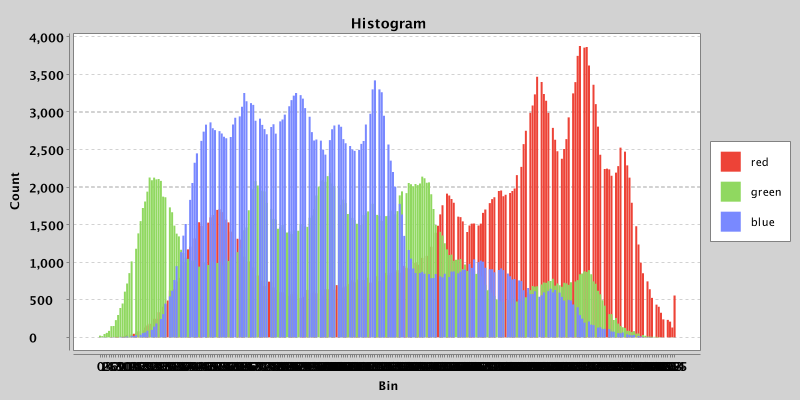

In [89]:
import net.imglib2.FinalInterval

// Set this to the image you want to analyze.
image = lena 

xLen = image.dimension(0)
yLen = image.dimension(1)
cLen = image.dimension(2)

// Create a chart.
import org.knowm.xchart.CategoryChart
import org.knowm.xchart.CategoryChartBuilder
CategoryChart chart = new CategoryChartBuilder().width(800).height(400).
    title("Histogram").xAxisTitle("Bin").yAxisTitle("Count").build();
chart.getStyler().setPlotGridVerticalLinesVisible(false).setOverlapped(true)

import java.awt.Color
cNames = ["red", "green", "blue"]
colors = [new Color(0xED4337), new Color(0x90D860), new Color(0x7989FF)]
for (c in 0..cLen - 1) {
  // Slice the image at this channel.
  slice = ij.op().transform().crop(image, FinalInterval.createMinSize(0, 0, c, xLen, yLen, 1))
  // Get the histogram.
  histogram = ij.op().image().histogram(slice)

  // Extract the counts to a Groovy-friendly data structure.
  counts = []
  for (value in histogram)
    counts.add(value.getRealDouble())
  chart.addSeries(cNames[c as int], (0..counts.size()-1), counts).setFillColor(colors[c as int])
}
nb.display(chart)

<font size="+1">__Quiz!__ What is wrong with those histograms?</font>

In [90]:
import net.imglib2.FinalInterval

// N-dimensional crop.
face = ij.op().transform().crop(lena, FinalInterval.createMinSize(200, 200, 0, 170, 195, 1), true)

// Type conversion.
face32 = ij.op().convert().float32(face)

// Median filter.
median = ij.op().run("create.img", face32)
neighborhood = new HyperSphereShape(4)
ij.op().run("filter.median", median, face32, neighborhood)

// Difference of Gaussians.
dogFormula = "gauss(image, sigma1) - gauss(image, sigma2)"
dog = ij.op().eval(dogFormula, [
  "image": face32,
  "sigma1": [20, 20],
  "sigma2": [4, 4]
])

// Grayscale morphology operators.
import net.imglib2.algorithm.neighborhood.HyperSphereShape
topHat = ij.op().morphology().topHat(face, [neighborhood])
blackTopHat = ij.op().morphology().blackTopHat(face, [neighborhood])

nb.display([["face": face, "median": median, "dog":dog, "topHat":topHat, "blackTopHat":blackTopHat]])

face,median,dog,topHat,blackTopHat


## Fourier transform with lowpass filter

In [91]:
import net.imglib2.util.Util
import net.imglib2.FinalDimensions

image = cells
radius = 10

def lowpass(fft, radius) {
  // Declare an array to hold the current position of the cursor.
  pos = new long[fft.numDimensions()]

  // Define origin as 0,0.
  long[] origin = [0, 0]

  // Define a 2nd 'origin' at bottom left of image.
  // This is a bit of a hack. We want to draw a circle around the origin,
  // since the origin is at 0,0 - the circle will 'reflect' to the bottom.
  long[] origin2 = [0, fft.dimension(1)]

  // Loop through all pixels.
  cursor = fft.localizingCursor()
  while (cursor.hasNext()) {
    cursor.fwd()
    cursor.localize(pos)

    // Calculate distance from 0,0 and bottom left corner
    // (so we can form the reflected semi-circle).
    dist = Util.distance(origin, pos)
    dist2 = Util.distance(origin2, pos)

    // If distance is above radius (cutoff frequency) set value of FFT to zero.
    if (dist > radius && dist2 > radius)
    cursor.get().setZero()
  }
}

// Perform fft of the input.
fft = ij.op().filter().fft(image)

// Filter it.
lowpass(fft, 10)

// Reverse the FFT.
import net.imglib2.type.numeric.real.FloatType
inverse = ij.op().run("create.img", image, new FloatType())
ij.op().filter().ifft(inverse, fft)

// Display the result.
nb.display([["image":image, "inverse":inverse]])

image,inverse
